In [ ]:
import pandas as pd
from api import JolpicaF1API
from utils import getConstructorColours, convert_lap_time_to_ms
from quali_plot_utils import plotQualiDrivers, plotQualiConstructors

In [ ]:
api = JolpicaF1API()

In [ ]:
qualifying_results = api.get_qualifying_results('2024', 12)

In [5]:
races = qualifying_results['MRData']['RaceTable']['Races']

In [6]:
quali = races[0]['QualifyingResults']

In [7]:
df = pd.json_normalize(quali, sep='_')

In [8]:
constructor_colors = getConstructorColours()

In [9]:
sessions = ["Q1", "Q2", "Q3"]

# Convert lap times for the valid sessions to milliseconds
for session in sessions:
    df[f'{session}_ms'] = df[session].apply(convert_lap_time_to_ms)

# Collect session columns for which we have times in milliseconds
sessions_ms_columns = [f'{s}_ms' for s in sessions]

if sessions_ms_columns:
    # Calculate the fastest lap time for each driver across the sessions
    df['fastest_lap_ms'] = df[sessions_ms_columns].min(axis=1, skipna=True)

    # Convert fastest lap from milliseconds back to time format
    df['fastest_lap'] = df['fastest_lap_ms']

# Calculate the time difference from the fastest lap
df['time_diff'] = (df['fastest_lap_ms'] - df['fastest_lap_ms'].min()) / 6000
df = df.sort_values(by='time_diff')

# Assign colors to teams
df['color'] = df['Constructor_name'].map(constructor_colors)

# Qualifying Analysis

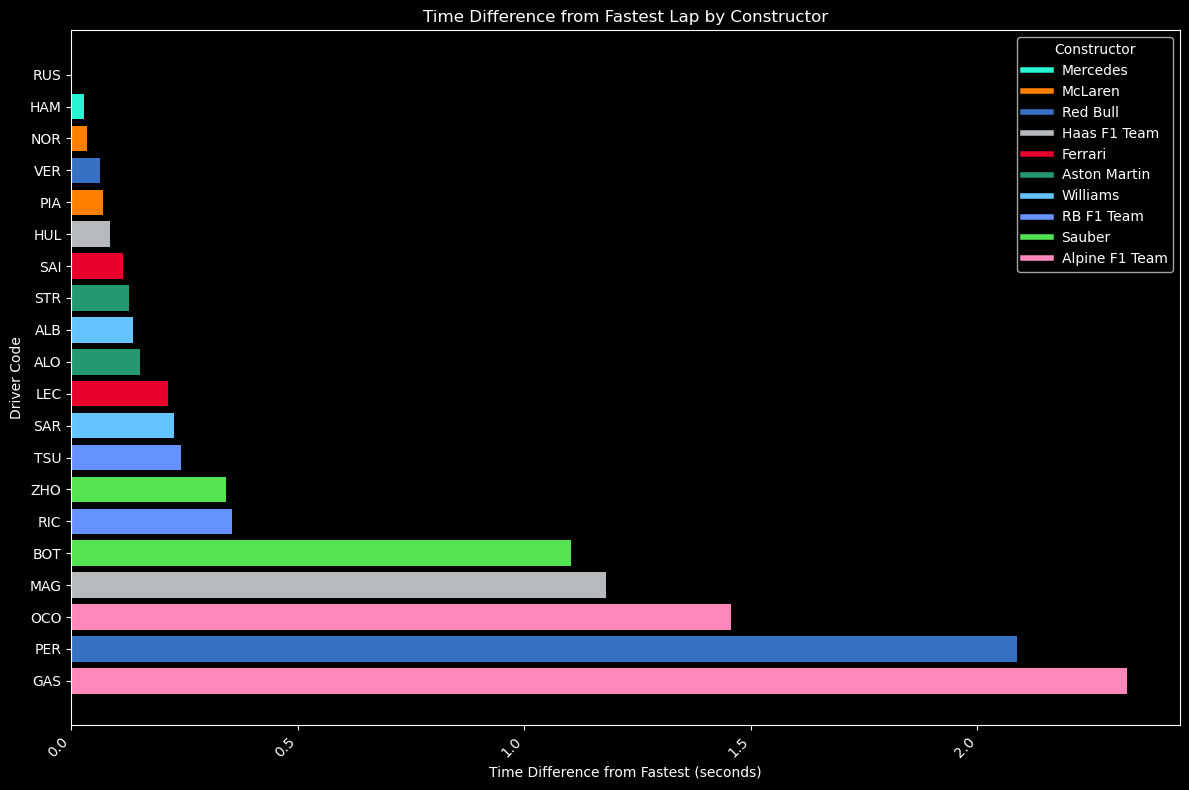

In [10]:
plotQualiDrivers(df)

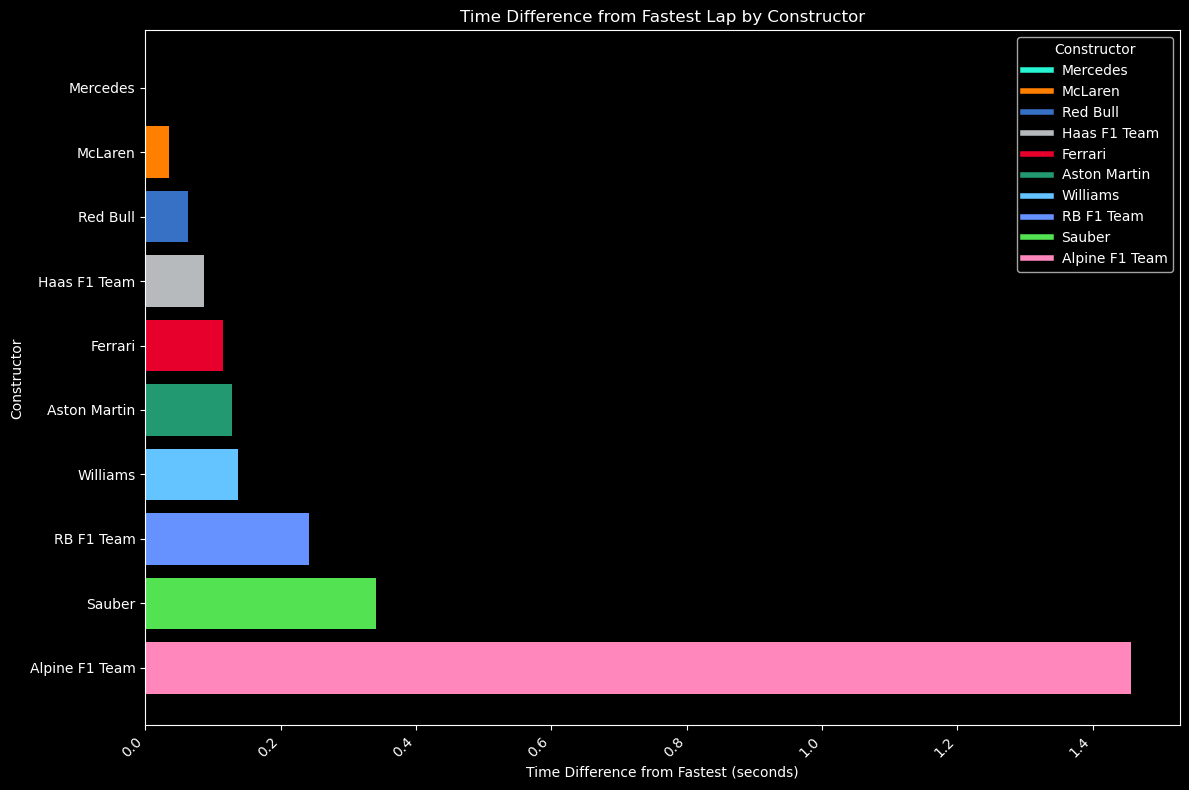

In [11]:
plotQualiConstructors(df)